# "Transform with NST"
## 3.1 Machine Learning - Neural Style Transfer

# Data Preprocessing
<p>Public dataset from The Met (The Metropolitian Museum of Art) is utilise to obtain the relevant artworks of Pablo Picasso, Claude Monet, and Hokusai. Data (images) are downloaded to Google Drive for convenient storing and management.   </p>

## Dataset Collection

In [ ]:
from google.colab import drive
from io import StringIO
from bs4 import BeautifulSoup

import os
import requests
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


<p>Download the CSV file provided by The Met for metadata.</p>

In [ ]:
!wget -O /content/drive/MyDrive/MetObjects.csv https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv


--2025-05-01 07:39:04--  https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317650992 (303M) [text/plain]
Saving to: ‘/content/drive/MyDrive/MetObjects.csv’

/content/drive/MyDr 100%[===================>] 302.94M  45.9MB/s    in 6.2s    

2025-05-01 07:39:18 (48.9 MB/s) - ‘/content/drive/MyDrive/MetObjects.csv’ saved [317650992/317650992]



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MetObjects.csv')
df.head()

<ipython-input-3-ffc09644c45f>:1: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/MetObjects.csv')


Object Number  Is Highlight  Is Timeline Work  Is Public Domain  Object ID  \
0    1979.486.1         False             False             False          1   
1    1980.264.5         False             False             False          2   
2      67.265.9         False             False             False          3   
3     67.265.10         False             False             False          4   
4     67.265.11         False             False             False          5   

  Gallery Number         Department AccessionYear Object Name  \
0            NaN  The American Wing        1979.0        Coin   
1            NaN  The American Wing        1980.0        Coin   
2            NaN  The American Wing        1967.0        Coin   
3            NaN  The American Wing        1967.0        Coin   
4            NaN  The American Wing        1967.0        Coin   

                          Title  ... River Classification  \
0  One-dollar Liberty Head Coin  ...   NaN            NaN   
1  Ten-dollar Liberty Head Coin  ...   NaN            NaN   
2    Two-and-a-Half Dollar Coin  ...   NaN            NaN   
3    Two-and-a-Half Dollar Coin  ...   NaN            NaN   
4    Two-and-a-Half Dollar Coin  ...   NaN            NaN   

  Rights and Reproduction                                     Link Resource  \
0                     NaN  http://www.metmuseum.org/art/collection/search/1   
1                     NaN  http://www.metmuseum.org/art/collection/search/2   
2                     NaN  http://www.metmuseum.org/art/collection/search/3   
3                     NaN  http://www.metmuseum.org/art/collection/search/4   
4                     NaN  http://www.metmuseum.org/art/collection/search/5   

  Object Wikidata URL Metadata Date                                Repository  \
0                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
1                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
2                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
3                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
4                 NaN           NaN  Metropolitan Museum of Art, New York, NY   

  Tags Tags AAT URL Tags Wikidata URL  
0  NaN          NaN               NaN  
1  NaN          NaN               NaN  
2  NaN          NaN               NaN  
3  NaN          NaN               NaN  
4  NaN          NaN               NaN  

[5 rows x 54 columns]

In [ ]:
from urllib.parse import urlparse

# Clean column names
df.columns = df.columns.str.strip()

# Filter for Picasso, Monet, and Hokusai
picasso_df = df[(df['Artist Display Name'] == 'Pablo Picasso') & (df['Object Name'] == 'Painting')]
monet_df = df[(df['Artist Display Name'] == 'Claude Monet') & (df['Object Name'] == 'Painting')]
hokusai_df = df[(df['Artist Display Name'] == 'Katsushika Hokusai') & (df['Object Name'] == 'Print')]

# Function to query MET API and print the JSON response
def check_json_response(object_id):
    api_url = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{object_id}'
    try:
        response = requests.get(api_url)
        response.raise_for_status()
        data = response.json()

        # Print the raw JSON response to see all the data
        print(f"JSON Response for Object ID {object_id}:")
        print(data)
        print("\n" + "-"*50 + "\n")
    except Exception as e:
        print(f"Error fetching JSON for Object ID {object_id}: {e}")

# Function to check JSON response for each object in the filtered DataFrame
def check_responses(df, artist_name, folder_name):
    print(f"Checking JSON responses for {artist_name}:")
    for index, row in df.iterrows():
        object_id = row.get('Object ID')
        if object_id:
            check_json_response(object_id)

# Check JSON response for Picasso, Monet, and Hokusai
check_responses(picasso_df, 'Pablo Picasso', 'Picasso')

Checking JSON responses for Pablo Picasso:
JSON Response for Object ID 480740:
{'objectID': 480740, 'isHighlight': False, 'accessionNumber': '1970.305', 'accessionYear': '1970', 'isPublicDomain': False, 'primaryImage': '', 'primaryImageSmall': '', 'additionalImages': [], 'constituents': [{'constituentID': 162244, 'role': 'Artist', 'name': 'Pablo Picasso', 'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500009666', 'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5593', 'gender': ''}], 'department': 'Modern and Contemporary Art', 'objectName': 'Painting', 'title': 'Faun with Stars', 'culture': '', 'period': '', 'dynasty': '', 'reign': '', 'portfolio': '', 'artistRole': 'Artist', 'artistPrefix': '', 'artistDisplayName': 'Pablo Picasso', 'artistDisplayBio': 'Spanish, Malaga 1881–1973 Mougins, France', 'artistSuffix': '', 'artistAlphaSort': 'Picasso, Pablo', 'artistNationality': 'Spanish', 'artistBeginDate': '1881', 'artistEndDate': '1973', 'artistGender': '', 'artistWik

### Fetched JSON response example for Picasso

In [ ]:
for object_id in picasso_df['Object ID'].dropna().unique():
    image_url = get_image_from_met_page(int(object_id))
    if image_url:
        print(f"Object ID {object_id}: {image_url}")
    else:
        print(f"No image found for Object ID {object_id}")

Object ID 480740: https://collectionapi.metmuseum.org/api/collection/v1/iiif/480740/1007281/restricted
Object ID 482391: https://collectionapi.metmuseum.org/api/collection/v1/iiif/482391/1006592/restricted
Object ID 483355: https://collectionapi.metmuseum.org/api/collection/v1/iiif/483355/1009088/restricted
Object ID 483366: https://collectionapi.metmuseum.org/api/collection/v1/iiif/483366/1009268/restricted
Object ID 485406: https://collectionapi.metmuseum.org/api/collection/v1/iiif/485406/1005024/restricted
Object ID 486081: https://collectionapi.metmuseum.org/api/collection/v1/iiif/486081/1009280/restricted
Object ID 486162: https://collectionapi.metmuseum.org/api/collection/v1/iiif/486162/1009269/restricted
Object ID 486739: https://collectionapi.metmuseum.org/api/collection/v1/iiif/486739/1009281/restricted
Object ID 486750: https://collectionapi.metmuseum.org/api/collection/v1/iiif/486750/1009270/restricted
Object ID 486753: https://collectionapi.metmuseum.org/api/collection/v1/i

In [ ]:
from bs4 import BeautifulSoup

# Create folders
base_dir = "/content/drive/MyDrive/MetPaintings/"
os.makedirs(os.path.join(base_dir, "Picasso"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "Monet"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "Hokusai"), exist_ok=True)

# Function to scrape image URL
def get_image_from_met_page(object_id):
    try:
        url = f"https://www.metmuseum.org/art/collection/search/{object_id}"
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            tag = soup.find('meta', property='og:image')
            if tag and tag.get('content'):
                return tag.get('content')
    except:
        return None

# Function to download the images from the image URL
def download_images(df, folder_name):
    folder_path = os.path.join(base_dir, folder_name)
    for object_id in df['Object ID'].dropna().unique():
        image_url = get_image_from_met_page(int(object_id))
        if image_url:
            save_path = os.path.join(folder_path, f"{int(object_id)}.jpg")
            try:
                r = requests.get(image_url)
                if r.status_code == 200:
                    with open(save_path, 'wb') as f:
                        f.write(r.content)
                    print(f"{object_id} downloaded.")
                else:
                    print(f"{object_id} failed: HTTP {r.status_code}")
            except Exception as e:
                print(f"{object_id} error: {e}")

# Download
download_images(picasso_df, "Picasso")
download_images(monet_df, "Monet")
download_images(hokusai_df, "Hokusai")

480740 downloaded.
482391 downloaded.
483355 downloaded.
483366 downloaded.
485406 downloaded.
486081 downloaded.
486162 downloaded.
486739 downloaded.
486750 downloaded.
486753 downloaded.
486754 downloaded.
486755 downloaded.
486841 downloaded.
486842 downloaded.
486843 downloaded.
486844 downloaded.
486845 downloaded.
487039 downloaded.
488221 downloaded.
488429 downloaded.
488596 downloaded.
488690 downloaded.
488710 downloaded.
488711 downloaded.
489124 downloaded.
489645 downloaded.
490013 downloaded.
490014 downloaded.
490018 downloaded.
490021 downloaded.
490022 downloaded.
490024 downloaded.
490025 downloaded.
490037 downloaded.
490587 downloaded.
500194 downloaded.
817649 downloaded.
437104 downloaded.
437105 downloaded.
437106 downloaded.
437107 downloaded.
437108 downloaded.
437109 downloaded.
437110 downloaded.
437111 downloaded.
437112 downloaded.
437113 downloaded.
437115 downloaded.
437117 downloaded.
437118 downloaded.
437119 downloaded.
437120 downloaded.
437121 downl

# NST: CNN Model with pretrained VGG19 network and PyTorch L-BFGS optimiser
<p>Please refer to other working file (NST_Experiments.ipynb) for all experimentation regarding model architecture settings selection.</p>

<p> The implemented model consists of data preprocessing, VGG-based feature extractor, optimisation loop, content loss, style loss, total variation (TV) loss, and LPIPS loss computation. </p>

In [ ]:
pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import lpips

# Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Image Function
def load_image(path, max_size=400):
    image = Image.open(path).convert('RGB')

    # Resize image by calculating scale factor
    size = max(image.size)
    scale = max_size / size
    new_size = (int(image.size[0]*scale), int(image.size[1]*scale))
    image = image.resize(new_size, Image.Resampling.LANCZOS)

    # Preprocessing of tensor conversion and normalisation for VGG input
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    return transform(image).unsqueeze(0).to(device)

# VGG-based Feature Extractor
class VGGFeatures(nn.Module):
    def __init__(self):
        super().__init__()
        # Load pretrained VGG19 model
        self.vgg = models.vgg19(pretrained=True).features[:21].to(device).eval()

        # Freeze all VGG parameters
        for param in self.vgg.parameters():
            param.requires_grad = False

    def forward(self, x):
        features = []
        # Pass the input through each layer
        for i, layer in enumerate(self.vgg):
            x = layer(x)
            # Extract and store feature maps
            if i in {0, 5, 10, 19}:
                features.append(x)
        return features

# Gram Matrices Computation Function
def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    features = tensor.view(c, h * w)
    gram = torch.mm(features, features.t())
    return gram / (c * h * w)

# Total Variation Loss (smoothness)
def total_variation_loss(img):
    diff_i = torch.mean(torch.abs(img[:, :, :, :-1] - img[:, :, :, 1:]))
    diff_j = torch.mean(torch.abs(img[:, :, :-1, :] - img[:, :, 1:, :]))
    return diff_i + diff_j

# Main Function: Perform NST
def run_style_transfer(content_img, style_img,
                       iterations=300,
                       style_weight=1e6,
                       content_weight=10,
                       tv_weight=1e-6,
                       lpips_weight=1.0):

    # Load the pretrained VGG19 for Feature Extraction
    model = VGGFeatures().to(device)
    # Load the LPIPS perceptual loss model (using AlexNet backend)
    loss_fn = lpips.LPIPS(net='alex').to(device)
    # Initialise target image as a clone of the content image
    target = content_img.clone().requires_grad_(True).to(device)
    # L-BFGS optimiser to iteratively update the target image
    optimizer = optim.LBFGS([target])

    # Extract content and style features
    style_features = model(style_img)
    content_features = model(content_img)
    style_grams = [gram_matrix(f) for f in style_features]

    run = [0]

    def closure():
        optimizer.zero_grad()
        target_features = model(target)

        style_loss = 0
        content_loss = 0

        # Calculate style loss as MSE between Gram matrices of target and style features
        for i in range(len(target_features)):
            gm = gram_matrix(target_features[i])
            style_loss += torch.mean((gm - style_grams[i]) ** 2)

        # Calculate content loss using a specific layer
        content_loss += torch.mean((target_features[2] - content_features[2]) ** 2)

        # Compute total variation loss
        tv_loss = total_variation_loss(target)
        # Compute LPIPS loss
        lpips_loss = loss_fn(target, content_img).mean()

        # Calculate total loss as a weighted sum of all components
        total_loss = (style_weight * style_loss
                      + content_weight * content_loss
                      + tv_weight * tv_loss
                      + lpips_weight * lpips_loss)

        # Backpropagate the total loss to compute gradients
        total_loss.backward()

        # Progress every 50 iterations
        run[0] += 1
        if run[0] % 50 == 0:
            print(f"Iteration {run[0]}/{iterations} | Total Loss: {total_loss.item():.4f}")
        return total_loss

    # Run the optimisation loop
    while run[0] < iterations:
        optimizer.step(closure)

    # Clamp final image
    target.data.clamp_(0, 1)
    # Return the stylised target image
    return target

# Display Image Function
def imshow(tensor, title=None):
    image = tensor.cpu().clone().squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

## Hyperparameter Tuning: Grid-Search Manual Tuning
<p>Manual tuning was executed initially as an additional technique to optimise the output visual quality, which has been explored in the report. Refer to <b>Stylisation Outcome</b> to observe the model outcome.</p>


Running style_weight=1e+06, content_weight=1


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 105MB/s]


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 140MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 27.1521
Iteration 100/300 | Total Loss: 19.6800
Iteration 150/300 | Total Loss: 17.5987
Iteration 200/300 | Total Loss: 16.6292
Iteration 250/300 | Total Loss: 16.0818
Iteration 300/300 | Total Loss: 15.7331


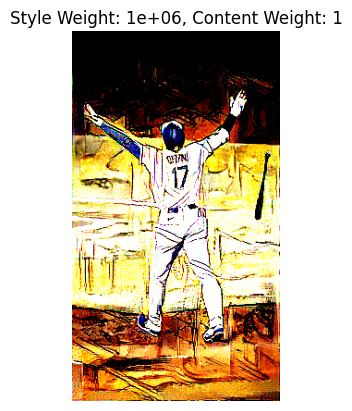


Running style_weight=1e+06, content_weight=10
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 98.3196
Iteration 100/300 | Total Loss: 89.5792
Iteration 150/300 | Total Loss: 87.2750
Iteration 200/300 | Total Loss: 86.2050
Iteration 250/300 | Total Loss: 85.5699
Iteration 300/300 | Total Loss: 85.1219


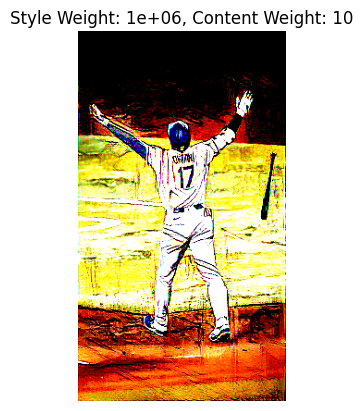


Running style_weight=1e+06, content_weight=50
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 287.6904
Iteration 100/300 | Total Loss: 277.3513
Iteration 150/300 | Total Loss: 273.3518
Iteration 200/300 | Total Loss: 271.1593
Iteration 250/300 | Total Loss: 269.6604
Iteration 300/300 | Total Loss: 268.6284


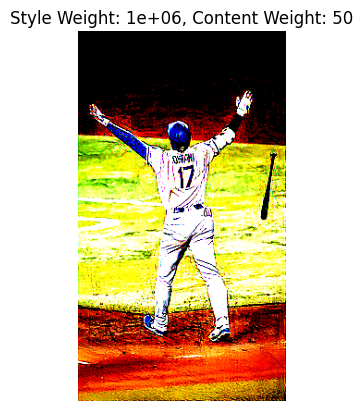


Running style_weight=5e+06, content_weight=1
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 79.4236
Iteration 100/300 | Total Loss: 47.6094
Iteration 150/300 | Total Loss: 37.6919
Iteration 200/300 | Total Loss: 33.4066
Iteration 250/300 | Total Loss: 30.8927
Iteration 300/300 | Total Loss: 29.2779


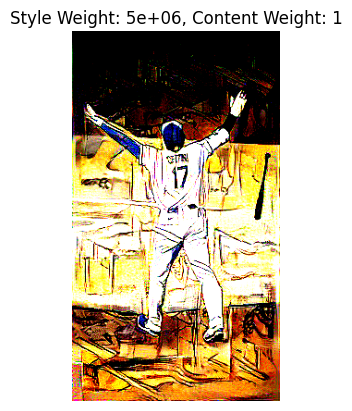


Running style_weight=5e+06, content_weight=10
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 187.3876
Iteration 100/300 | Total Loss: 147.8703
Iteration 150/300 | Total Loss: 136.3200
Iteration 200/300 | Total Loss: 131.2693
Iteration 250/300 | Total Loss: 128.4749
Iteration 300/300 | Total Loss: 126.7160


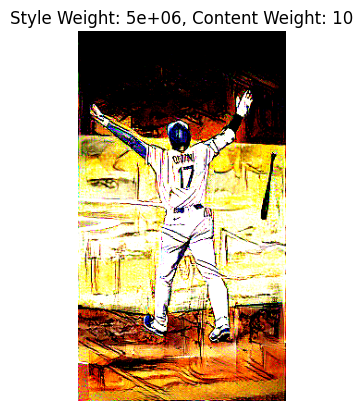


Running style_weight=5e+06, content_weight=50
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 491.7581
Iteration 100/300 | Total Loss: 447.4695
Iteration 150/300 | Total Loss: 435.5645
Iteration 200/300 | Total Loss: 430.1309
Iteration 250/300 | Total Loss: 426.7779
Iteration 300/300 | Total Loss: 424.4483


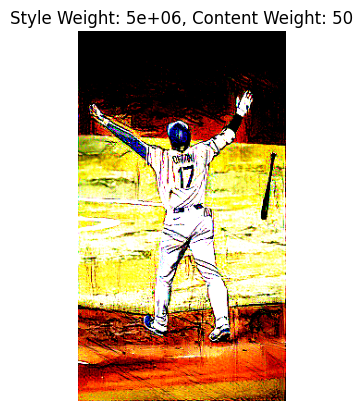


Running style_weight=1e+07, content_weight=1
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 144.5678
Iteration 100/300 | Total Loss: 75.5585
Iteration 150/300 | Total Loss: 58.4109
Iteration 200/300 | Total Loss: 50.2866
Iteration 250/300 | Total Loss: 45.3712
Iteration 300/300 | Total Loss: 42.2854


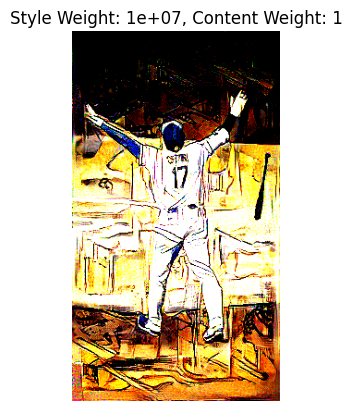


Running style_weight=1e+07, content_weight=10
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 262.5964
Iteration 100/300 | Total Loss: 192.1811
Iteration 150/300 | Total Loss: 171.5234
Iteration 200/300 | Total Loss: 162.4121
Iteration 250/300 | Total Loss: 157.1305
Iteration 300/300 | Total Loss: 153.7644


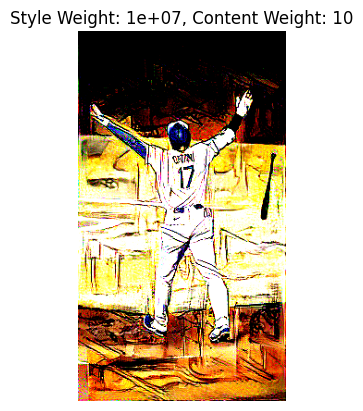


Running style_weight=1e+07, content_weight=50
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 636.8863
Iteration 100/300 | Total Loss: 546.3607
Iteration 150/300 | Total Loss: 521.9609
Iteration 200/300 | Total Loss: 511.4971
Iteration 250/300 | Total Loss: 505.8839
Iteration 300/300 | Total Loss: 502.2111


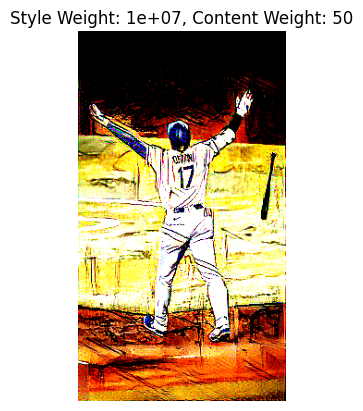

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import lpips

# Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Image Function
def load_image(path, max_size=400):
    image = Image.open(path).convert('RGB')

    # Resize image by calculating scale factor
    size = max(image.size)
    scale = max_size / size
    new_size = (int(image.size[0]*scale), int(image.size[1]*scale))
    image = image.resize(new_size, Image.Resampling.LANCZOS)

    # Preprocessing of tensor conversion and normalisation for VGG input
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    return transform(image).unsqueeze(0).to(device)

# VGG-based Feature Extractor
class VGGFeatures(nn.Module):
    def __init__(self):
        super().__init__()
        # Load pretrained VGG19 model
        self.vgg = models.vgg19(pretrained=True).features[:21].to(device).eval()

        # Freeze all VGG parameters
        for param in self.vgg.parameters():
            param.requires_grad = False

    def forward(self, x):
        features = []
        # Pass the input through each layer
        for i, layer in enumerate(self.vgg):
            x = layer(x)
            # Extract and store feature maps
            if i in {0, 5, 10, 19}:
                features.append(x)
        return features

# Gram Matrices Computation Function
def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    features = tensor.view(c, h * w)
    gram = torch.mm(features, features.t())
    return gram / (c * h * w)

# Total Variation Loss (smoothness)
def total_variation_loss(img):
    diff_i = torch.mean(torch.abs(img[:, :, :, :-1] - img[:, :, :, 1:]))
    diff_j = torch.mean(torch.abs(img[:, :, :-1, :] - img[:, :, 1:, :]))
    return diff_i + diff_j

# Main Function: Perform NST
def run_style_transfer(content_img, style_img,
                       iterations=300,
                       style_weight=1e6,
                       content_weight=10,
                       tv_weight=1e-6,
                       lpips_weight=1.0):

    # Load the pretrained VGG19 for Feature Extraction
    model = VGGFeatures().to(device)
    # Load the LPIPS perceptual loss model (using AlexNet backend)
    loss_fn = lpips.LPIPS(net='alex').to(device)
    # Initialise target image as a clone of the content image
    target = content_img.clone().requires_grad_(True).to(device)
    # L-BFGS optimiser to iteratively update the target image
    optimizer = optim.LBFGS([target])

    # Extract content and style features
    style_features = model(style_img)
    content_features = model(content_img)
    style_grams = [gram_matrix(f) for f in style_features]

    run = [0]

    def closure():
        optimizer.zero_grad()
        target_features = model(target)

        style_loss = 0
        content_loss = 0

        # Calculate style loss as MSE between Gram matrices of target and style features
        for i in range(len(target_features)):
            gm = gram_matrix(target_features[i])
            style_loss += torch.mean((gm - style_grams[i]) ** 2)

        # Calculate content loss using a specific layer
        content_loss += torch.mean((target_features[2] - content_features[2]) ** 2)

        # Compute total variation loss
        tv_loss = total_variation_loss(target)
        # Compute LPIPS loss
        lpips_loss = loss_fn(target, content_img).mean()

        # Calculate total loss as a weighted sum of all components
        total_loss = (style_weight * style_loss
                      + content_weight * content_loss
                      + tv_weight * tv_loss
                      + lpips_weight * lpips_loss)

        # Backpropagate the total loss to compute gradients
        total_loss.backward()

        # Progress every 50 iterations
        run[0] += 1
        if run[0] % 50 == 0:
            print(f"Iteration {run[0]}/{iterations} | Total Loss: {total_loss.item():.4f}")
        return total_loss

    # Run the optimisation loop
    while run[0] < iterations:
        optimizer.step(closure)

    # Clamp final image
    target.data.clamp_(0, 1)
    # Return the stylised target image
    return target

# Display Image Function
def imshow(tensor, title=None):
    image = tensor.cpu().clone().squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Hyperparameter arrays
style_weights = [1e6, 5e6, 1e7]
content_weights = [1, 10, 50]

# Load Images:
content_img = load_image("/content/drive/MyDrive/assets/people_3.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Hokusai/56019.jpg")

# Run NST with Manual Hyperparameter Tuning
for sw in style_weights:
    for cw in content_weights:
        print(f"\nRunning style_weight={sw:.0e}, content_weight={cw}")
        output = run_style_transfer(
            content_img=content_img,
            style_img=style_img,
            iterations=300,
            style_weight=sw,
            content_weight=cw
        )
        imshow(output, title=f"Style Weight: {sw:.0e}, Content Weight: {cw}")

## Stylisation Outcome

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 96.1652
Iteration 100/300 | Total Loss: 60.9534
Iteration 150/300 | Total Loss: 50.9982
Iteration 200/300 | Total Loss: 46.4340
Iteration 250/300 | Total Loss: 43.8086
Iteration 300/300 | Total Loss: 42.0770


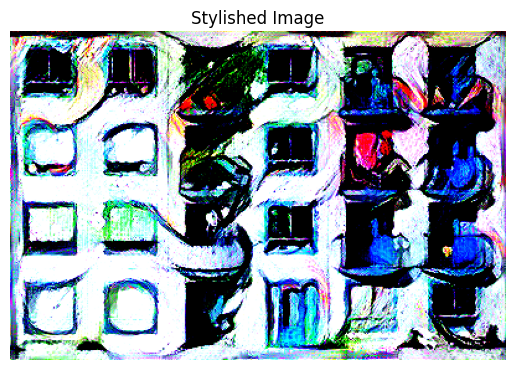

In [ ]:
# Load Images:
# Architecture 1 - Picasso
content_img = load_image("/content/drive/MyDrive/assets/architecture_1.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Picasso/486842.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=1e7, # chosen style weight
    content_weight=1.0, # chosen content weight
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:10<00:00, 53.5MB/s]


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 138MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 165.1954
Iteration 100/300 | Total Loss: 153.6902
Iteration 150/300 | Total Loss: 150.5457
Iteration 200/300 | Total Loss: 149.0076
Iteration 250/300 | Total Loss: 148.0172
Iteration 300/300 | Total Loss: 147.2741


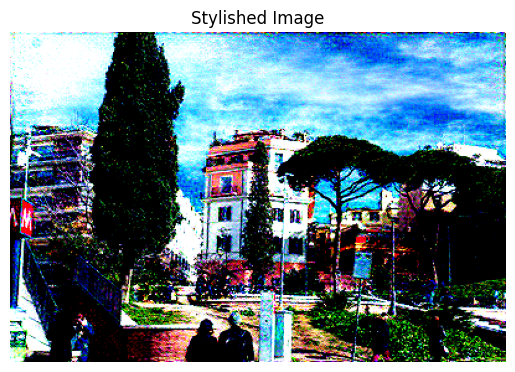

In [ ]:
# Load Images:
# Architecture 2 - Monet
content_img = load_image("/content/drive/MyDrive/assets/architecture_2.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Monet/437111.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=50.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 46.6279
Iteration 100/300 | Total Loss: 40.4015
Iteration 150/300 | Total Loss: 38.1644
Iteration 200/300 | Total Loss: 36.8751
Iteration 250/300 | Total Loss: 36.0621
Iteration 300/300 | Total Loss: 35.5047


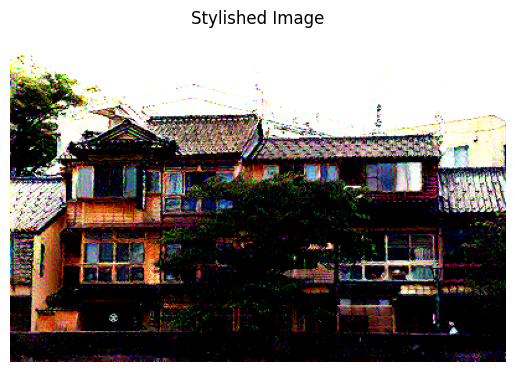

In [ ]:
# Load Images:
# Architecture 3 - Hokusai
content_img = load_image("/content/drive/MyDrive/assets/architecture_3.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Hokusai/54349.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=10.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 26.4552
Iteration 100/300 | Total Loss: 16.1124
Iteration 150/300 | Total Loss: 12.6663
Iteration 200/300 | Total Loss: 10.8217
Iteration 250/300 | Total Loss: 9.7192
Iteration 300/300 | Total Loss: 9.0755


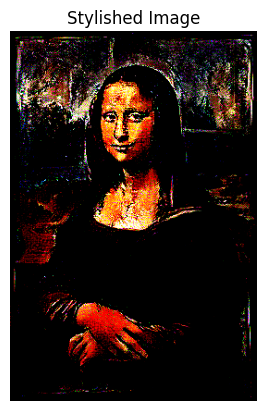

In [ ]:
# Load Images:
# Drawing 1 - Picasso
content_img = load_image("/content/drive/MyDrive/monaLisa.png")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Picasso/490014.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=1.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 72.1910
Iteration 100/300 | Total Loss: 64.1499
Iteration 150/300 | Total Loss: 62.0762
Iteration 200/300 | Total Loss: 61.2394
Iteration 250/300 | Total Loss: 60.7986
Iteration 300/300 | Total Loss: 60.5079


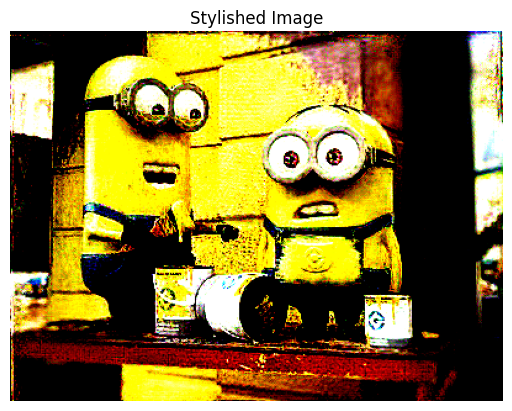

In [ ]:
# Load Images:
# Drawing 2 - Monet
content_img = load_image("/content/drive/MyDrive/assets/drawing_2.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Monet/459107.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=10.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 274.1584
Iteration 100/300 | Total Loss: 238.7430
Iteration 150/300 | Total Loss: 231.1412
Iteration 200/300 | Total Loss: 228.0399
Iteration 250/300 | Total Loss: 226.2323
Iteration 300/300 | Total Loss: 224.9797


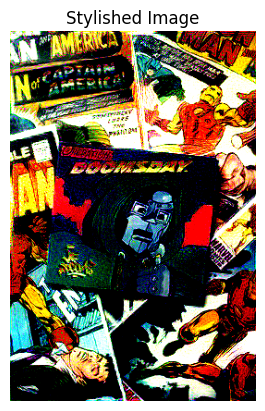

In [ ]:
# Load Images:
# Drawing 3 - Hokusai
content_img = load_image("/content/drive/MyDrive/assets/drawing_3.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Hokusai/54305.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=1e7,
    content_weight=10.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 184.6541
Iteration 100/300 | Total Loss: 171.2591
Iteration 150/300 | Total Loss: 167.1489
Iteration 200/300 | Total Loss: 165.0205
Iteration 250/300 | Total Loss: 163.5681
Iteration 300/300 | Total Loss: 162.4908


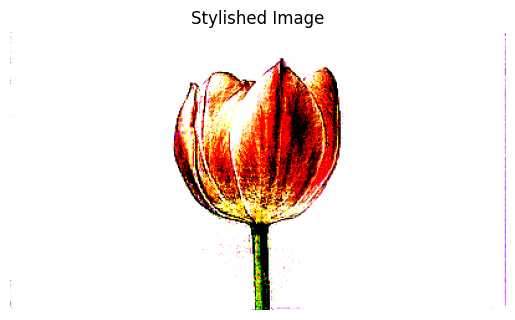

In [ ]:
# Load Images:
# Nature 1 - Picasso
content_img = load_image("/content/drive/MyDrive/assets/nature_1.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Picasso/490037.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=1e6,
    content_weight=50.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 47.1488
Iteration 100/300 | Total Loss: 45.4523
Iteration 150/300 | Total Loss: 44.5519
Iteration 200/300 | Total Loss: 43.9997
Iteration 250/300 | Total Loss: 43.6287
Iteration 300/300 | Total Loss: 43.3605


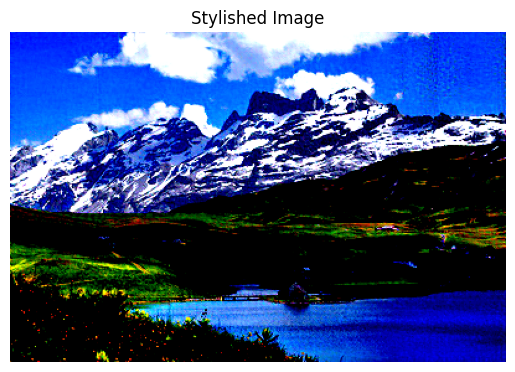

In [ ]:
# Load Images:
# Nature 2 - Monet
content_img = load_image("/content/drive/MyDrive/assets/nature_2.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Monet/437118.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=1e6,
    content_weight=50.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 387.5727
Iteration 100/300 | Total Loss: 319.3428
Iteration 150/300 | Total Loss: 304.2559
Iteration 200/300 | Total Loss: 297.0163
Iteration 250/300 | Total Loss: 292.5044
Iteration 300/300 | Total Loss: 289.3528


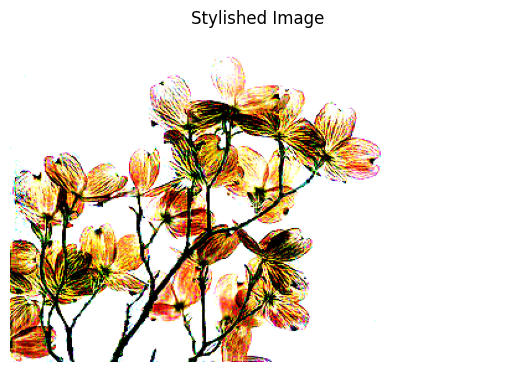

In [ ]:
# Load Images:
# Nature 3 - Hokusai
content_img = load_image("/content/drive/MyDrive/assets/nature_3.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Hokusai/55039.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=50.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 968.5328
Iteration 100/300 | Total Loss: 863.4036
Iteration 150/300 | Total Loss: 840.6497
Iteration 200/300 | Total Loss: 832.7621
Iteration 250/300 | Total Loss: 828.6432
Iteration 300/300 | Total Loss: 826.0277


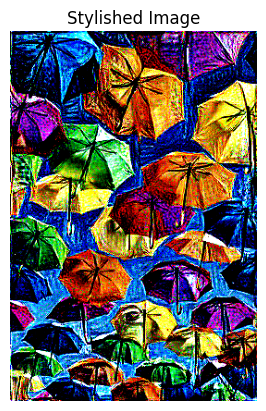

In [ ]:
# Load Images:
# Object 1 - Picasso
content_img = load_image("/content/drive/MyDrive/assets/object_1.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Picasso/487039.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=1e7,
    content_weight=50.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 63.5567
Iteration 100/300 | Total Loss: 45.8569
Iteration 150/300 | Total Loss: 41.3138
Iteration 200/300 | Total Loss: 39.5698
Iteration 250/300 | Total Loss: 38.7159
Iteration 300/300 | Total Loss: 38.2190


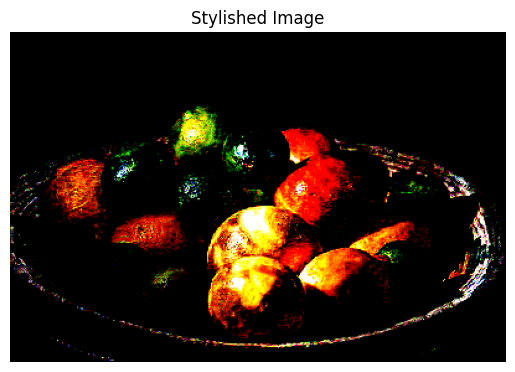

In [ ]:
# Load Images:
# Object 2 - Monet
content_img = load_image("/content/drive/MyDrive/assets/object_2.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Monet/437130.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=10.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 185.1737
Iteration 100/300 | Total Loss: 161.9775
Iteration 150/300 | Total Loss: 153.3942
Iteration 200/300 | Total Loss: 149.5873
Iteration 250/300 | Total Loss: 147.5039
Iteration 300/300 | Total Loss: 146.1824


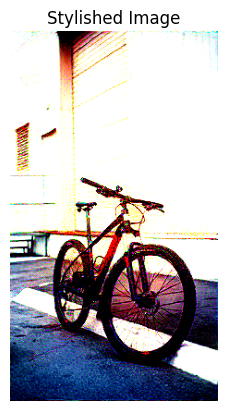

In [ ]:
# Load Images:
# Object 3 - Hokusai
content_img = load_image("/content/drive/MyDrive/assets/object_3.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Hokusai/54430.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=50.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 52.3745
Iteration 100/300 | Total Loss: 42.9139
Iteration 150/300 | Total Loss: 39.0401
Iteration 200/300 | Total Loss: 37.1305
Iteration 250/300 | Total Loss: 35.8469
Iteration 300/300 | Total Loss: 34.8126


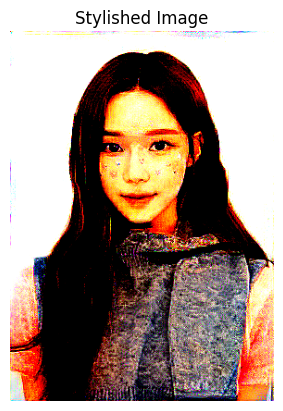

In [ ]:
# Load Images:
# People 1 - Picasso
content_img = load_image("/content/drive/MyDrive/assets/people_1.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Picasso/486081.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=10.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 59.3689
Iteration 100/300 | Total Loss: 51.2926
Iteration 150/300 | Total Loss: 48.1192
Iteration 200/300 | Total Loss: 46.2265
Iteration 250/300 | Total Loss: 44.9013
Iteration 300/300 | Total Loss: 43.8737


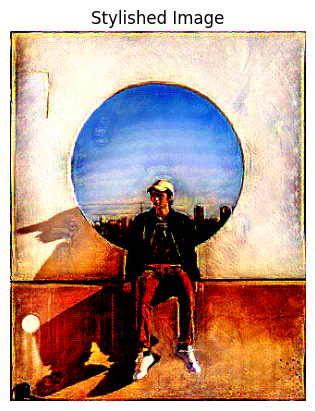

In [ ]:
# Load Images:
# People 2 - Monet
content_img = load_image("/content/drive/MyDrive/assets/people_2.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Monet/437104.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=5e6,
    content_weight=10.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Iteration 50/300 | Total Loss: 288.1552
Iteration 100/300 | Total Loss: 278.0452
Iteration 150/300 | Total Loss: 274.1461
Iteration 200/300 | Total Loss: 271.9934
Iteration 250/300 | Total Loss: 270.5565
Iteration 300/300 | Total Loss: 269.5254


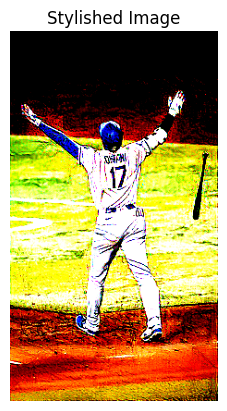

In [ ]:
# Load Images:
# People 3 - Hokusai
content_img = load_image("/content/drive/MyDrive/assets/people_3.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Hokusai/56019.jpg")

# Run NST
output = run_style_transfer(
    content_img,
    style_img,
    iterations=300,
    style_weight=1e6,
    content_weight=50.0,
    lpips_weight=5.0
)

# Show result
imshow(output, title="Stylished Image")

# Imaginative Application (Extension)
<p>Please run this section independently since it requires manual setup for interactive application. Alternatively, please refer to the report for the application documentation.</p>

In [ ]:
pip install ipywidgets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import io

# Optional LPIPS
try:
    import lpips
    lpips_fn = lpips.LPIPS(net='alex').to('cuda' if torch.cuda.is_available() else 'cpu')
except ImportError:
    lpips_fn = None
    print("LPIPS not installed. Proceeding without it.")

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image loader
def load_image(path, max_size=400):
    image = Image.open(path).convert('RGB')
    size = max(image.size)
    scale = max_size / size
    new_size = (int(image.size[0]*scale), int(image.size[1]*scale))
    image = image.resize(new_size, Image.Resampling.LANCZOS)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    return transform(image).unsqueeze(0).to(device)

# Convert tensor to PIL Image
def tensor_to_pil(tensor):
    unloader = transforms.ToPILImage()
    image = tensor.squeeze(0).cpu().clamp(0, 1)
    image = unloader(image)
    return image

# VGG features
class VGGFeatures(nn.Module):
    def __init__(self):
        super(VGGFeatures, self).__init__()
        self.vgg = models.vgg19(pretrained=True).features[:21].to(device).eval()
        for param in self.vgg.parameters():
            param.requires_grad = False

    def forward(self, x):
        features = []
        for layer_num, layer in enumerate(self.vgg):
            x = layer(x)
            if layer_num in {0, 5, 10, 19}:
                features.append(x)
        return features

# Gram matrix
def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    features = tensor.view(b * c, h * w)
    gram = torch.mm(features, features.t())
    return gram / (c * h * w)

# Total Variation Loss
def total_variation_loss(img):
    tv_h = torch.mean((img[:, :, :-1, :] - img[:, :, 1:, :]) ** 2)
    tv_w = torch.mean((img[:, :, :, :-1] - img[:, :, :, 1:]) ** 2)
    return tv_h + tv_w

# Main style transfer function with TV and LPIPS
def run_style_transfer(content_img, style_img, iterations=300, style_weight=1e6, content_weight=1,
                       tv_weight=1e-6, lpips_weight=0.1, save_every=10):
    model = VGGFeatures().to(device)
    target = content_img.clone().requires_grad_(True).to(device)
    optimizer = optim.LBFGS([target])

    style_features = model(style_img)
    content_features = model(content_img)
    style_grams = [gram_matrix(f) for f in style_features]

    run = [0]
    saved_images = []

    while run[0] < iterations:
        def closure():
            optimizer.zero_grad()
            target_features = model(target)
            style_loss = 0
            content_loss = 0

            for tf, sf in zip(target_features, style_grams):
                gm = gram_matrix(tf)
                style_loss += torch.mean((gm - sf) ** 2)

            content_loss = torch.mean((target_features[2] - content_features[2]) ** 2)
            tv_loss = total_variation_loss(target)

            if lpips_fn:
                lpips_loss = lpips_fn(target, content_img).mean()
            else:
                lpips_loss = torch.tensor(0.0).to(device)

            total_loss = (
                style_weight * style_loss +
                content_weight * content_loss +
                tv_weight * tv_loss +
                lpips_weight * lpips_loss
            )
            total_loss.backward()
            run[0] += 1

            if run[0] % save_every == 0 or run[0] == iterations:
                with torch.no_grad():
                    tmp = target.clone().detach()
                    tmp.data.clamp_(0, 1)
                    saved_images.append(tmp.cpu())
                print(f"Iteration {run[0]}/{iterations}, Total Loss: {total_loss.item():.2f}")

            return total_loss

        optimizer.step(closure)

    target.data.clamp_(0, 1)
    return saved_images

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


In [ ]:
import io

# Load Images:
# People 3 - Hokusai
content_img = load_image("/content/drive/MyDrive/assets/people_3.jpg")
style_img = load_image("/content/drive/MyDrive/MetPaintings/Hokusai/56019.jpg")

# Run NST
saved_imgs = run_style_transfer(content_img, style_img, iterations=300,
                                style_weight=1e6, content_weight=50.0,
                                lpips_weight=5.0, save_every=10)

# --- Interactive viewer ---
# Convert first tensor to PIL image to get actual size
first_pil_img = tensor_to_pil(saved_imgs[0])
img_width, img_height = first_pil_img.size

# Set widget layouts dynamically based on image size
output_img_widget = widgets.Image(
    format='png',
    layout=widgets.Layout(width=f'{img_width}px', height=f'{img_height}px')
)

slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(saved_imgs)-1,
    step=1,
    description='Iteration:',
    layout=widgets.Layout(width=f'{img_width}px')
)

def update_image(change):
    idx = change['new']
    pil_img = tensor_to_pil(saved_imgs[idx])
    with io.BytesIO() as output_bytes:
        pil_img.save(output_bytes, format='PNG')
        output_img_widget.value = output_bytes.getvalue()

slider.observe(update_image, names='value')

update_image({'new': 0})

vbox_layout = widgets.Layout(width=f'{img_width + 10}px')

display(widgets.VBox([output_img_widget, slider], layout=vbox_layout))


Iteration 10/300, Total Loss: 364.91
Iteration 20/300, Total Loss: 316.13
Iteration 30/300, Total Loss: 300.50
Iteration 40/300, Total Loss: 292.98
Iteration 50/300, Total Loss: 288.33
Iteration 60/300, Total Loss: 285.10
Iteration 70/300, Total Loss: 282.68
Iteration 80/300, Total Loss: 280.81
Iteration 90/300, Total Loss: 279.28
Iteration 100/300, Total Loss: 278.04
Iteration 110/300, Total Loss: 277.02
Iteration 120/300, Total Loss: 276.14
Iteration 130/300, Total Loss: 275.38
Iteration 140/300, Total Loss: 274.74
Iteration 150/300, Total Loss: 274.16
Iteration 160/300, Total Loss: 273.64
Iteration 170/300, Total Loss: 273.16
Iteration 180/300, Total Loss: 272.74
Iteration 190/300, Total Loss: 272.36
Iteration 200/300, Total Loss: 271.99
Iteration 210/300, Total Loss: 271.65
Iteration 220/300, Total Loss: 271.34
Iteration 230/300, Total Loss: 271.06
Iteration 240/300, Total Loss: 270.80
Iteration 250/300, Total Loss: 270.56
Iteration 260/300, Total Loss: 270.33
Iteration 270/300, To

## Example Application Usage

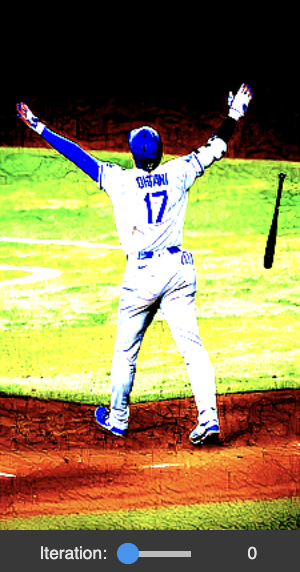

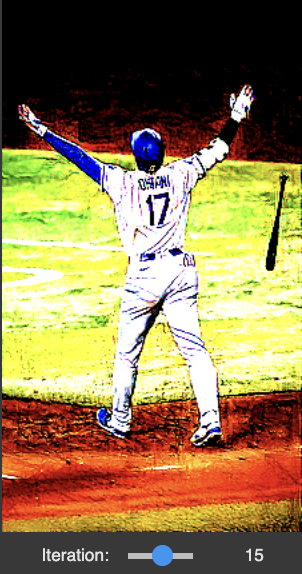

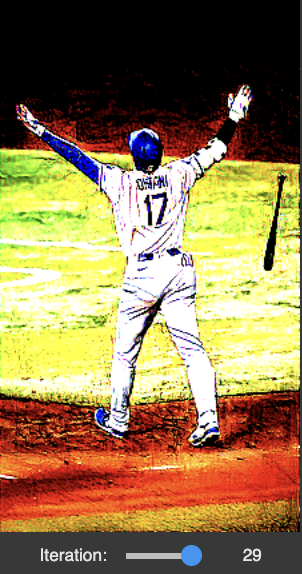